# Phase 4 (Modelling)

## Introduction
In this phase, we delve into the modelling aspect of our project. Initially, our dataset did not yield satisfactory results despite preprocessing efforts, prompting us to reevaluate our approach. Consequently, we modified the dataset, leading to a slight shift in our research focus.
One notable adjustment involved excluding the Acorn classifications from the dataset, which streamlined our data processing efforts. This modification facilitated a clearer exploration of our research problem.

Our research problem revolves around predicting the average daily electricity consumption of households using various weather and temporal variables. Our objective is to develop a predictive model leveraging these features and potentially other factors influencing daily electricity consumption. The ultimate goal is to achieve accurate predictions that empower households to better plan and manage their energy consumption.

The preprocessing steps undertaken can be found [here](../Phase%203/phase_3_temp.ipynb) detailing the data preparation procedures preceding the modelling phase.
Furthermore, in this phase, we continue to preprocess the data to ensure compatibility with machine and deep learning models. We identify the most correlated features to be utilized in our prediction task and perform the train-test split, with the test data representing the last month of the time series.

Our modeling endeavors encompass a comprehensive suite of algorithms, including GradientBoostingRegressor, RandomForestRegressor, LinearRegression, Support Vector Machine, and KNN Regressor. We apply these algorithms to our preprocessed data and rigorously evaluate their performance using key metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (Coefficient of Determination). Visualization of the results obtained from this phase provides valuable insights into the effectiveness of each algorithm in predicting electricity consumption.

Through these endeavours, we aim to develop a robust predictive model that can accurately forecast household electricity consumption, thereby empowering users to make informed decisions regarding their energy usage.

## Refinement of Preprocessed Data for Modelling

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
import math
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


plt.style.use("ggplot")

In [3]:
data = pd.read_csv('../data/final_df.csv')
print(data.shape)
data.head()

(814, 24)


,day,TotEnergyPerDay,HouseCount,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,AvgEnergyPerDay,month,date
0,2011-11-23,90.385000,13.0,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,...,1.0,8.24,3.81,10.36,2.18,0.94,0,6.952692,11,23
1,2011-11-24,213.412000,25.0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,...,1.0,9.71,8.56,12.93,7.01,0.97,0,8.536480,11,24
2,2011-11-25,303.993000,32.0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,...,1.0,7.01,7.46,12.27,4.84,0.01,0,9.499781,11,25
3,2011-11-26,420.976000,41.0,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,...,1.0,11.59,7.01,12.96,4.69,0.05,1,10.267707,11,26
4,2011-11-27,444.883001,41.0,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,...,1.0,1.31,4.47,13.54,2.94,0.08,1,10.850805,11,27


In [4]:
data.rename(columns={'AvgEnergyPerDay':'avg_energy'}, inplace=True)
data['day'] = pd.to_datetime(data['day'])

In [5]:
encoder = LabelEncoder()
encoder.fit(data['day'])

LabelEncoder()

In [6]:
data['datetime'] = encoder.transform(data['day'])
data.head()

,day,TotEnergyPerDay,HouseCount,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,avg_energy,month,date,datetime
0,2011-11-23,90.385000,13.0,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,...,8.24,3.81,10.36,2.18,0.94,0,6.952692,11,23,0
1,2011-11-24,213.412000,25.0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,...,9.71,8.56,12.93,7.01,0.97,0,8.536480,11,24,1
2,2011-11-25,303.993000,32.0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,...,7.01,7.46,12.27,4.84,0.01,0,9.499781,11,25,2
3,2011-11-26,420.976000,41.0,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,...,11.59,7.01,12.96,4.69,0.05,1,10.267707,11,26,3
4,2011-11-27,444.883001,41.0,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,...,1.31,4.47,13.54,2.94,0.08,1,10.850805,11,27,4


In [7]:
data.columns

Index(['day', 'TotEnergyPerDay', 'HouseCount', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'holiday', 'avg_energy', 'month',
       'date', 'datetime'],
      dtype='object')

### Feature Selection Based on Correlation Analysis

<Axes: >

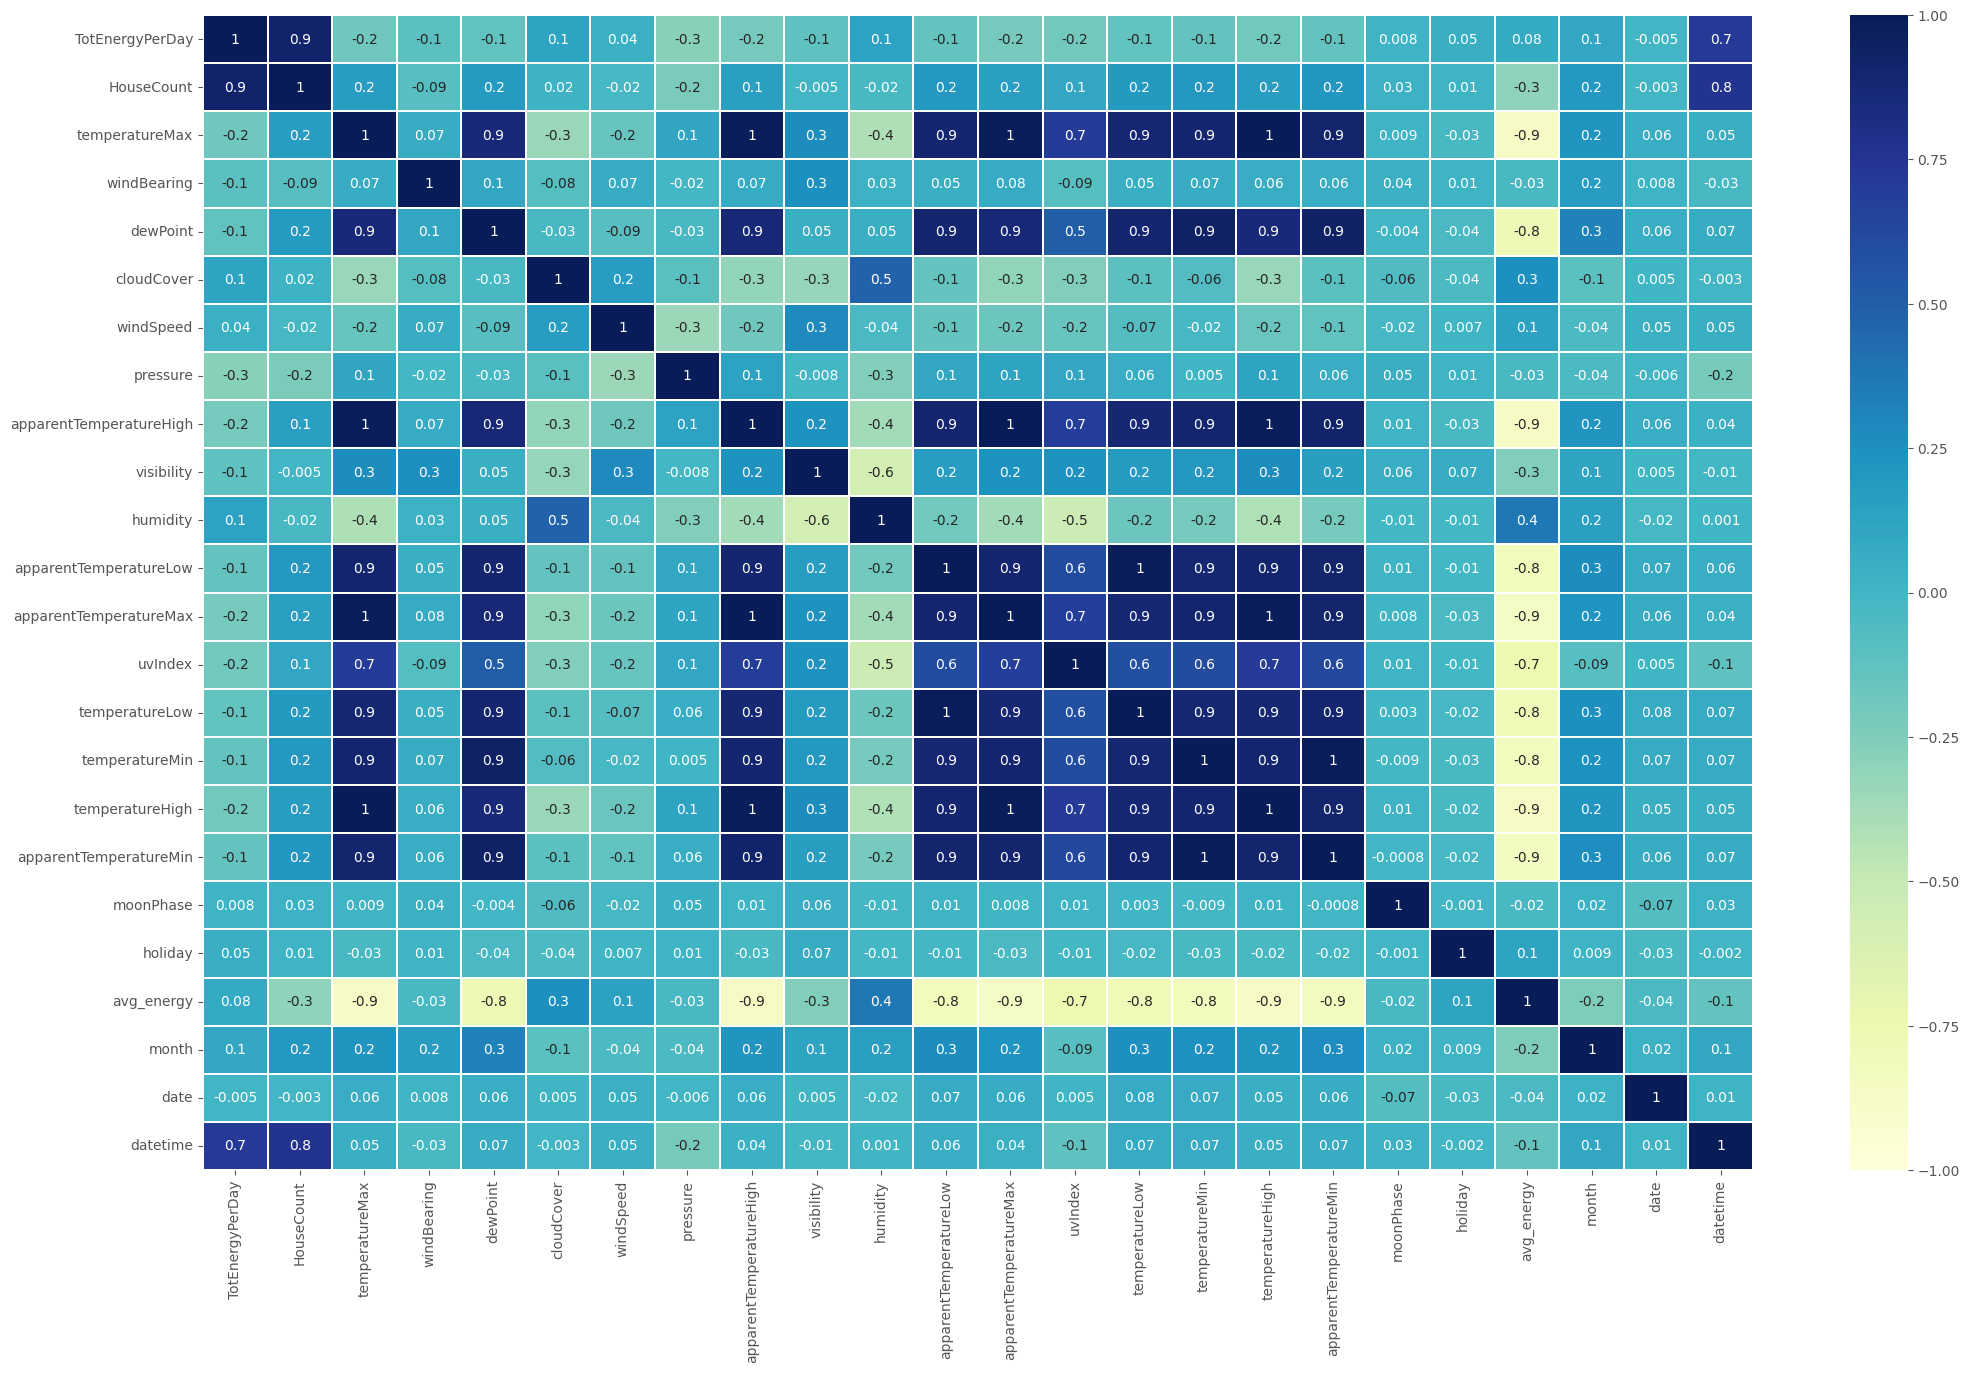

In [8]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, cmap="YlGnBu", linewidths=0.3, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, ax=ax)

In [9]:
corr.reset_index(inplace=True)

corr

,index,TotEnergyPerDay,HouseCount,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday,avg_energy,month,date,datetime
0,TotEnergyPerDay,1.000000,0.915806,-0.187123,-0.113584,-0.129771,0.129604,0.042581,-0.278022,-0.208201,...,-0.139866,-0.144675,-0.191298,-0.141464,0.007967,0.052920,0.083514,0.107984,-0.005314,0.717162
1,HouseCount,0.915806,1.000000,0.171133,-0.090851,0.186900,0.021621,-0.022422,-0.228748,0.149502,...,0.187508,0.196290,0.167569,0.209490,0.027112,0.010073,-0.296892,0.195899,-0.002507,0.763521
2,temperatureMax,-0.187123,0.171133,1.000000,0.065057,0.865539,-0.336483,-0.154566,0.116475,0.986241,...,0.882945,0.896492,0.997829,0.912133,0.008852,-0.026507,-0.868227,0.223795,0.057541,0.053136
3,windBearing,-0.113584,-0.090851,0.065057,1.000000,0.097245,-0.078488,0.068910,-0.015310,0.074863,...,0.054384,0.067198,0.060528,0.056905,0.039871,0.014172,-0.026252,0.165700,0.007982,-0.027522
4,dewPoint,-0.129771,0.186900,0.865539,0.097245,1.000000,-0.028777,-0.090325,-0.029675,0.870845,...,0.893604,0.938839,0.862387,0.940720,-0.003516,-0.035757,-0.774964,0.326642,0.060302,0.070039
5,cloudCover,0.129604,0.021621,-0.336483,-0.078488,-0.028777,1.000000,0.173106,-0.098622,-0.313072,...,-0.112808,-0.064976,-0.338471,-0.105724,-0.062218,-0.039425,0.254421,-0.106630,0.004767,-0.002742
6,windSpeed,0.042581,-0.022422,-0.154566,0.068910,-0.090325,0.173106,1.000000,-0.348339,-0.186912,...,-0.071869,-0.020116,-0.162972,-0.130203,-0.022213,0.006651,0.143949,-0.040876,0.046300,0.053940
7,pressure,-0.278022,-0.228748,0.116475,-0.015310,-0.029675,-0.098622,-0.348339,1.000000,0.137001,...,0.057463,0.004926,0.127865,0.056396,0.046934,0.009537,-0.027421,-0.041822,-0.005675,-0.213136
8,apparentTemperatureHigh,-0.208201,0.149502,0.986241,0.074863,0.870845,-0.313072,-0.186912,0.137001,1.000000,...,0.875803,0.890863,0.989536,0.914857,0.013152,-0.027334,-0.868233,0.224617,0.059819,0.036558
9,visibility,-0.118580,-0.005453,0.268954,0.256030,0.054023,-0.328007,0.281842,-0.008045,0.240543,...,0.184459,0.202365,0.267652,0.162909,0.057299,0.068394,-0.253636,0.118330,0.005382,-0.011934


In [10]:
# Selecting features based on correlation
high_corr_features = [j for i, j in zip(corr['avg_energy'], corr['index']) if abs(i) > 0.2]
print(high_corr_features)

features_to_drop = ['HouseCount']
features_to_keep = ['day']

for i in high_corr_features:
    if i in features_to_drop:
        continue
    features_to_keep.append(i)

features_to_keep

['HouseCount', 'temperatureMax', 'dewPoint', 'cloudCover', 'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh', 'apparentTemperatureMin', 'avg_energy', 'month']


['day',
 'temperatureMax',
 'dewPoint',
 'cloudCover',
 'apparentTemperatureHigh',
 'visibility',
 'humidity',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'uvIndex',
 'temperatureLow',
 'temperatureMin',
 'temperatureHigh',
 'apparentTemperatureMin',
 'avg_energy',
 'month']

### Training and Testing Data
To prepare our dataset for modeling, we divided the data into training and testing sets based on the day. The training set (train) includes data up to January 31, 2014, while the testing set (test) consists of data from February 2014.

In [11]:
# splitting into train and test

train = data[data['day'] < "2014-02-01"][features_to_keep]
test = data[data['day'] >= "2014-02-01"][features_to_keep]

print(train.head())
print(test.head())

         day  temperatureMax  dewPoint  cloudCover  apparentTemperatureHigh  \
0 2011-11-23           10.36      6.29        0.36                    10.36   
1 2011-11-24           12.93      8.56        0.41                    12.93   
2 2011-11-25           13.03      7.24        0.48                    12.27   
3 2011-11-26           12.96      6.96        0.44                    12.96   
4 2011-11-27           13.54      5.76        0.42                    13.54   

   visibility  humidity  apparentTemperatureLow  apparentTemperatureMax  \
0        8.06      0.93                    6.56                   10.36   
1       10.64      0.89                    7.30                   12.93   
2       12.38      0.79                    4.69                   13.03   
3       13.07      0.81                   11.59                   12.96   
4       13.08      0.72                    1.31                   13.54   

   uvIndex  temperatureLow  temperatureMin  temperatureHigh  \
0      1.0 

### Implementing Accuracy Evaluation for Regression Tasks
Next we'll define a function 'accuracy' which aims to calculate the accuracy score for a regression task. It utilizes a binary classification approach, determining whether the predicted value falls within the lower and upper bounds of the true value. If the predicted value falls within this range, it's labeled as one; otherwise, it's labeled as zero. This approach enables the function to compute the accuracy score, representing how many predictions were close to the true value. The resulting count is then compared to the total number of points, reflecting perfect accuracy if all predictions were correct.

In [12]:
# form an accuracy function for regression task

def accuracy(y, y_pred):
    yhat_lower = []
    yhat_upper = []
    y_bin = [1]*len(y)
    y_pred_bin = []
    for i in y:
        yhat_lower.append(i-0.5)
        yhat_upper.append(i+0.5)
    for i, j, k in zip(yhat_lower, yhat_upper, y_pred):
        if k < j and k > i:
            y_pred_bin.append(1)
        else:
            y_pred_bin.append(0)
    acc_score = accuracy_score(y_bin, y_pred_bin)
    return acc_score

#### Initializing Result Dataframe

In [13]:
# initialize a result_df to store results
result_df = pd.DataFrame()
result_df['day'] = test['day']
result_df.set_index('day', inplace=True)


####  Setting 'Day' as Index

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

In [15]:
train.head()

,day,temperatureMax,dewPoint,cloudCover,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,avg_energy,month
0,2011-11-23,10.36,6.29,0.36,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,6.952692,11
1,2011-11-24,12.93,8.56,0.41,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,8.536480,11
2,2011-11-25,13.03,7.24,0.48,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,9.499781,11
3,2011-11-26,12.96,6.96,0.44,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,10.267707,11
4,2011-11-27,13.54,5.76,0.42,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,10.850805,11


In [16]:
test.head()

,day,temperatureMax,dewPoint,cloudCover,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,avg_energy,month
787,2014-02-01,9.72,3.18,0.19,4.27,11.60,0.76,2.81,6.86,1.0,6.24,4.83,8.32,1.10,11.710582,2
788,2014-02-02,9.30,2.63,0.22,6.48,12.89,0.72,2.02,6.48,1.0,4.97,5.79,9.30,3.21,12.078164,2
789,2014-02-03,7.99,2.86,0.47,4.59,12.50,0.79,1.12,4.59,1.0,4.22,4.97,7.99,1.96,11.280011,2
790,2014-02-04,8.88,2.69,0.42,5.63,12.05,0.75,1.03,5.63,1.0,5.54,4.22,8.88,1.12,11.095584,2
791,2014-02-05,9.64,4.06,0.73,5.86,10.91,0.77,3.56,5.86,1.0,7.01,5.54,9.64,1.03,11.415105,2


In [17]:
train.set_index('day', inplace=True)
test.set_index('day', inplace=True)

train

,temperatureMax,dewPoint,cloudCover,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,avg_energy,month
day,,,,,,,,,,,,,,,
2011-11-23,10.36,6.29,0.36,10.36,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,6.952692,11
2011-11-24,12.93,8.56,0.41,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,8.536480,11
2011-11-25,13.03,7.24,0.48,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,9.499781,11
2011-11-26,12.96,6.96,0.44,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,10.267707,11
2011-11-27,13.54,5.76,0.42,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,10.850805,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-27,7.95,1.44,0.38,4.34,12.68,0.79,1.43,4.34,1.0,4.81,2.56,7.95,-2.02,11.753871,1
2014-01-28,9.12,3.59,0.61,6.34,11.94,0.83,1.21,6.34,1.0,4.76,5.03,9.12,1.96,11.344805,1
2014-01-29,5.46,3.05,0.93,1.36,9.53,0.90,0.36,2.53,1.0,3.66,3.72,4.79,0.18,11.800777,1


### Data Partitioning: Training, Validation, and Test Sets
Next the data is divided into three parts: training data (X_train, y_train), validation data (X_val, y_val), and test data (X_test, y_test).

**Training Data** (X_train, y_train):
- X_train is formed from the training dataset train by excluding the "avg_energy" column.
- y_train represents the target class in the training dataset, which consists of the values from the "avg_energy" column.

**Validation Data** (X_val, y_val):
- X_val is created from the training dataset train by selecting the last 27 observations.
- y_val corresponds to the target class in the validation dataset, containing the values from the "avg_energy" column for the last 27 observations.

**Test Data** (X_test, y_test):
- X_test is derived from the test dataset test, excluding the "avg_energy" column.
- y_test represents the target class in the test dataset, consisting of the values from the "avg_energy" column.

Additionally, result_df['target'] is set to one DataFrame associated with the test data, allowing comparison between predicted values and actual values.

In [18]:
X_train = train.drop(['avg_energy'], axis=1).iloc[:len(train)-27,:]
X_val = train.drop('avg_energy', axis=1).iloc[len(train)-27:,:]

y_train = train['avg_energy'][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]

X_test = test.drop('avg_energy', axis=1)
y_test = test['avg_energy']


result_df['target'] = y_test

Scaling: Surprisingly, we obtained improved results when using unscaled data, which led us to deviate from our original plan to scale the features.

In [19]:
""" X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test) """


scaler_used = False

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((760, 14), (760,), (27, 14), (27,), (27, 14), (27,))

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((760, 1, 14), (760,), (27, 1, 14), (27,))

In [21]:
print(X_train)

[[[10.36  6.29  0.36 ... 10.36  2.18 11.  ]]

 [[12.93  8.56  0.41 ... 12.93  7.01 11.  ]]

 [[13.03  7.24  0.48 ... 12.27  4.84 11.  ]]

 ...

 [[10.75  6.02  0.4  ... 10.27  3.36  1.  ]]

 [[10.49  5.08  0.4  ... 10.14  2.77  1.  ]]

 [[ 9.58  5.21  0.61 ...  9.58  1.16  1.  ]]]


In [22]:
""" X_test = keras.utils.normalize(X_test, axis=1)
X_train = keras.utils.normalize(X_train, axis=1) """
norm_used = False

In [23]:
""" # define options for hyperparameter tuning

unit_options = [32, 64, 128, 256]
dropout_opts = [0.01, 0.05, 0.1, 0.3]
learning_rate_opts = [0.001, 0.01, 0.1]
batch_size_opts = [16, 32, 64]

# total iterations
total_iterations = len(unit_options) * len(dropout_opts) * len(learning_rate_opts) * len(batch_size_opts)
print(f'Total combinations: {total_iterations}')

epochs = 100
patience = 20

best_model = None
best_val_loss = np.inf

from keras import optimizers
for units in unit_options:
    for dropout in dropout_opts:
        for lr in learning_rate_opts:
            for batch_size in batch_size_opts:
                print(f'Training model with {units} units, dropout {dropout}, learning rate {lr}, batch_size {batch_size}')
                model = Sequential([
                    LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=dropout),
                    LSTM(units=units, return_sequences=False, dropout=dropout),
                    Dense(units=10, activation='linear'),
                    Dropout(0.01),
                    Dense(1, activation='linear')
                ])

                model.compile(loss='mae', optimizer=optimizers.Adam(learning_rate=lr), metrics=['mean_squared_error'])

                early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])

                best_epoch_val_loss = min(history.history['val_loss'])
                if best_epoch_val_loss < best_val_loss:
                    best_val_loss = best_epoch_val_loss
                    best_model = model
                    print(f'New best model found: Units={units}, Dropout={dropout}, LR={lr}, val_loss={best_val_loss}')

best_model.save('../models/best_LSTM_new.h5') """

" # define options for hyperparameter tuning\n\nunit_options = [32, 64, 128, 256]\ndropout_opts = [0.01, 0.05, 0.1, 0.3]\nlearning_rate_opts = [0.001, 0.01, 0.1]\nbatch_size_opts = [16, 32, 64]\n\n# total iterations\ntotal_iterations = len(unit_options) * len(dropout_opts) * len(learning_rate_opts) * len(batch_size_opts)\nprint(f'Total combinations: {total_iterations}')\n\nepochs = 100\npatience = 20\n\nbest_model = None\nbest_val_loss = np.inf\n\nfrom keras import optimizers\nfor units in unit_options:\n    for dropout in dropout_opts:\n        for lr in learning_rate_opts:\n            for batch_size in batch_size_opts:\n                print(f'Training model with {units} units, dropout {dropout}, learning rate {lr}, batch_size {batch_size}')\n                model = Sequential([\n                    LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=dropout),\n                    LSTM(units=units, return_sequences=False, dropout=dropou

## Modelling

### LSTM Neural Network
In this section, we implement a Long Short-Term Memory (LSTM) neural network for the task of predicting household energy consumption. The architecture of the LSTM model consists of multiple LSTM layers followed by dense layers. Each LSTM layer is configured with a specific number of units and dropout rate to control overfitting. The model is compiled using the mean absolute error (MAE) loss function and the Adam optimizer with a specified initial learning rate.

Early stopping is employed as a regularization technique to prevent overfitting by monitoring the validation loss and terminating training if it does not improve for a certain number of epochs.


In [24]:
# modeling
from keras import optimizers
units1 = 256
units2 = 128
units3 = 64
units4 = 32
denseunits = 16
dropout1 = 0.1
dropout2 = 0.2
dropout3 = 0.3
dropout4 = 0.4
start_lr = 0.001


LSTM_model = Sequential([
    LSTM(units=units1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=dropout1),
    LSTM(units=units2, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=dropout2),
    LSTM(units=units3, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=dropout3),
    LSTM(units=units4, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=denseunits, activation='linear'),
    Dropout(dropout4),
    Dense(1, activation='linear')
])

LSTM_model.compile(loss='mae', optimizer=optimizers.Adam(learning_rate=start_lr), metrics=['mean_squared_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, restore_best_weights=True)

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            277504    
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

Next we'll define a learning rate scheduler which adjusts the learning rate during training based on the current epoch.

The scheduler function takes two arguments: epoch and lr (learning rate). It returns the updated learning rate based on the current epoch. In this specific implementation, the learning rate is multiplied by the exponential decay factor math.exp(-0.01) after the first epoch.

The LearningRateScheduler callback is then initialized with the scheduler function. During training, this callback will be called after each epoch to update the learning rate according to the defined schedule.

In [25]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * math.exp(-0.01)

lr_scheduler = LearningRateScheduler(scheduler)

### Training LSTM Model
The training process will run for a maximum of 1000 epochs or until early stopping criteria are met. The model's performance metrics and loss values during training and validation will be stored in the history variable for later analysis and visualization.

In [26]:
# training

history = LSTM_model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])

Epoch 1/1000
24/24 [==============================] - 8s 67ms/step - loss: 9.7739 - mean_squared_error: 99.9139 - val_loss: 9.3692 - val_mean_squared_error: 88.0580 - lr: 0.0010
Epoch 2/1000
24/24 [==============================] - 0s 13ms/step - loss: 5.4150 - mean_squared_error: 37.9473 - val_loss: 3.1099 - val_mean_squared_error: 9.9224 - lr: 9.9005e-04
Epoch 3/1000
24/24 [==============================] - 0s 13ms/step - loss: 2.7614 - mean_squared_error: 11.5832 - val_loss: 1.0879 - val_mean_squared_error: 1.4334 - lr: 9.8020e-04
Epoch 4/1000
24/24 [==============================] - 0s 13ms/step - loss: 2.5735 - mean_squared_error: 10.4390 - val_loss: 2.0469 - val_mean_squared_error: 4.4395 - lr: 9.7045e-04
Epoch 5/1000
24/24 [==============================] - 0s 12ms/step - loss: 2.5029 - mean_squared_error: 9.9030 - val_loss: 1.8563 - val_mean_squared_error: 3.6954 - lr: 9.6079e-04
Epoch 6/1000
24/24 [==============================] - 0s 13ms/step - loss: 2.4404 - mean_squared_er

In [27]:
# saving model
import os

model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

def get_next_model_number(directory):
    max_num = -1
    for filename in os.listdir(directory):
        if filename.startswith('LSTM_') and filename.endswith('.h5'):
            num = int(filename.split('_')[1].split('.')[0])
            if num > max_num:
                max_num = num
        if filename.startswith('XGB_') and filename.endswith('.bin'):
            num = int(filename.split('_')[1].split('.')[0])
            if num > max_num:
                max_num = num
        if filename.startswith('GBR_') and filename.endswith('.joblib'):
            num = int(filename.split('_')[1].split('.')[0])
            if num > max_num:
                max_num = num
    return max_num + 1

num = get_next_model_number(model_dir)


In [28]:
LSTM_model_path = os.path.join(model_dir, f'LSTM_{num}.h5')
LSTM_model.save(LSTM_model_path)

### Visualization of LSTM training & validation accuracy and loss values

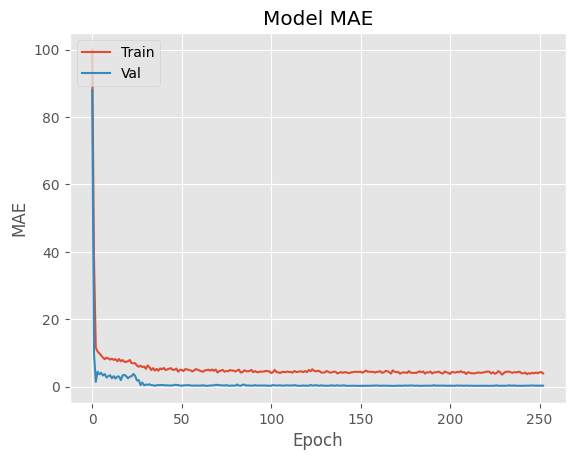

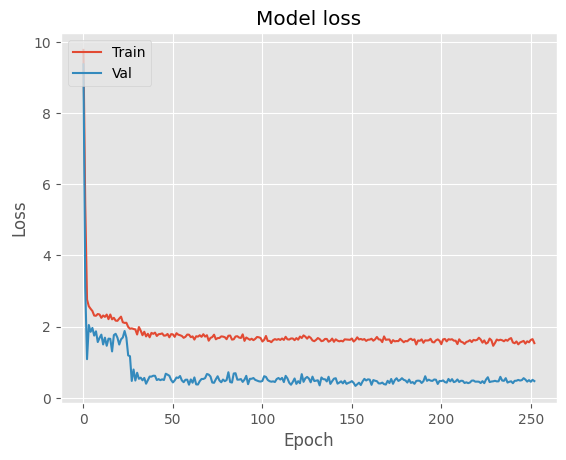

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Above plots indicate that the training curve is above the validation curve, which usually suggests overfitting, meaning the model learns the training data too well and does not generalize well to new, unseen data. This may result in the model performing well on the training data but poorly on the validation data or new observations.

As the gap between the curves remains constant, it may imply that the model is no longer improving its performance but remains stable. This could indicate that the model has reached its optimal performance or that it cannot learn more from the given dataset.

In [30]:
""" from keras.models import load_model

best_LSTM = load_model('../models/best_LSTM_new.h5') """

" from keras.models import load_model\n\nbest_LSTM = load_model('../models/best_LSTM_new.h5') "

#### Performance Comparison: True vs Predicted Values Using LSTM

In [31]:
y_test_pred = LSTM_model.predict(X_test)
y_test_pred_rnn = np.reshape(y_test_pred, (y_test_pred.shape[0]))

1/1 [==============================] - 1s 1s/step


In [32]:
result_df['lstm'] = y_test_pred_rnn

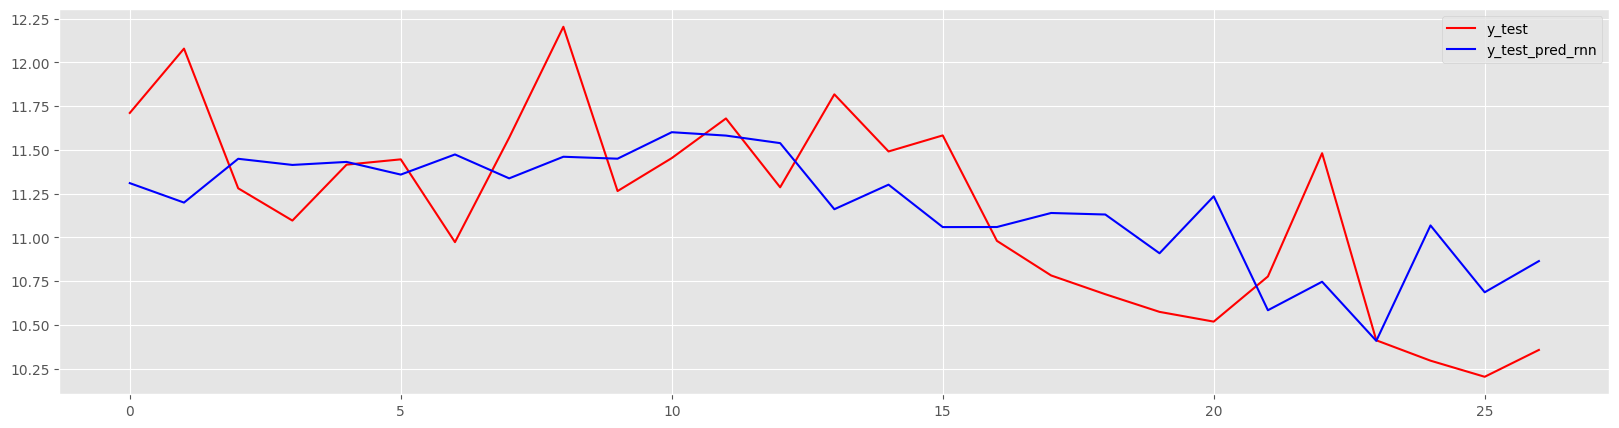

In [33]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_rnn, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
plt.show()

In [34]:

testMSEScore = mean_squared_error(y_test, y_test_pred_rnn)
print('Test Score: %.2f MSE' % (testMSEScore))

Test Score: 0.20 MSE


In [ ]:
result_df['GBR'] = y_test_pred_gbr

In [35]:

testMAEScore = mean_absolute_error(y_test, y_test_pred_rnn)
print("testScore : %.2f MAE" % (testMAEScore))

testScore : 0.37 MAE


In [36]:

testR2 = r2_score(y_test, y_test_pred_rnn)
print("test R2 score : %.2f R2" % (testR2))

test R2 score : 0.32 R2


The model performance on the test data is quite good, as the mean squared error (MSE) is relatively small, at 0.20. This means that, on average, the model's predictions deviate by 0.20 units from the actual values in the test data. A smaller MSE indicates better performance of the model in prediction.

The test performance score, measured by mean absolute error (MAE), is 0.37. This implies that, on average, the model's predictions differ by 0.37 units from the actual values in the test dataset.

The test R² score is 0.32, indicating that the model explains approximately 22% of the variance in the test data.

### XGBOOST
In the following section, we utilize XGBoost, an efficient and scalable implementation of gradient boosting, to address our prediction task. In this implementation, we set the learning rate (xg_lr) to 0.001, the maximum depth of each tree (maxDepth) to 3, and the number of estimators (nEstimators) to 1000. The silent parameter is set to 1 to suppress the printing of messages during training. We fit the XGBoost model to our training data (X_train and y_train), with evaluation sets for both training and validation data to monitor model performance. Finally, we visualize the feature importance using the plot_importance function provided by XGBoost.

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)


(760, 1, 14) (27, 1, 14) (760,) (27,) (27, 1, 14) (27,)
(760, 14) (27, 14) (760,) (27,) (27, 14) (27,)


In [38]:
# XGBOOST
import xgboost as xgb
xg_lr = 0.001
maxDepth = 3
nEstimators = 1000
silent_opt = 1


xg_model = xgb.XGBRegressor(learning_rate=xg_lr, max_depth=maxDepth, n_estimators=nEstimators, silent=silent_opt)

In [39]:
xg_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

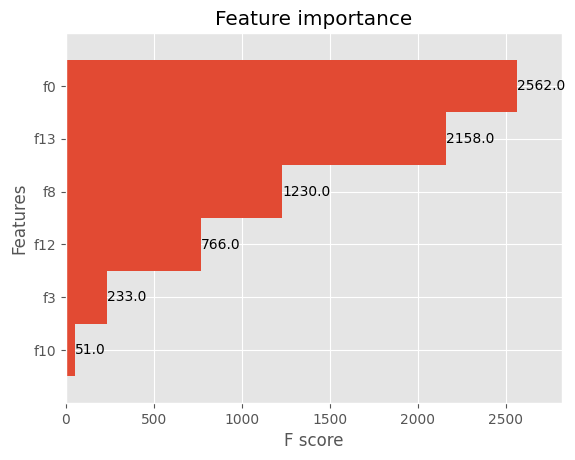

In [40]:
xgb.plot_importance(xg_model, height=1.0)

#### Performance Comparison: True vs Predicted Values Using XGBoost


In [41]:

y_test_pred_xg = xg_model.predict(X_test)
result_df['xg'] = y_test_pred_xg


In [42]:

testScoreXG_MSE = mean_squared_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MSE' % (testScoreXG_MSE))

Test Score: 0.31 MSE


In [43]:

testScoreXG_MAE = mean_absolute_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MAE' % (testScoreXG_MAE))

Test Score: 0.45 MAE


In [44]:

testR2_XG = r2_score(y_test, y_test_pred_xg)
print("test R2 score : %.2f R2" % (testR2_XG))

test R2 score : -0.05 R2


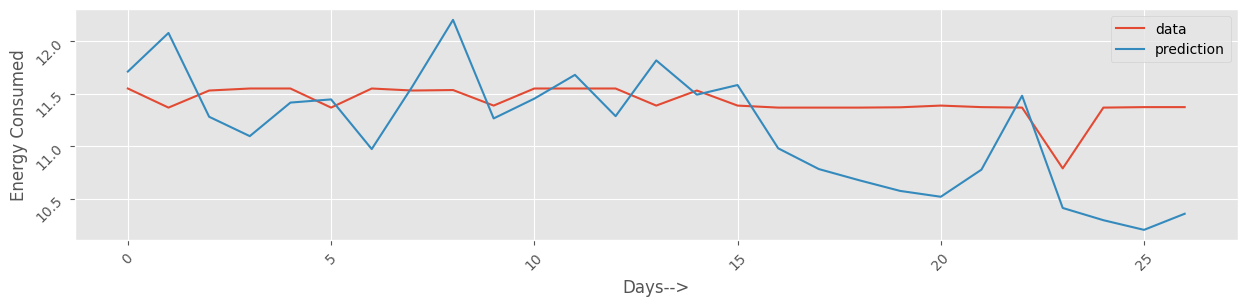

In [45]:
fig, ax1 = plt.subplots(figsize=(15,3))
ax1.plot(y_test_pred_xg, label='data')
ax1.plot(y_test, label='prediction')
ax1.set_xlabel('Days-->')
ax1.set_ylabel('Energy Consumed')
ax1.legend(("y_test_pred_xg", "y_test"))
ax1.tick_params(rotation=45)
plt.legend()

The XGBoost model achieved a test mean squared error (MSE) of 0.31, indicating that, on average, the predictions deviate from the true values by 0.31 units. Additionally, the mean absolute error (MAE) on the test set was 0.45, representing the average absolute difference between the predicted and true values. However, the test R-squared (R2) score was -0.05, indicating that the model's performance was poor. A negative R2 score suggests that the model fails to capture the variance in the data.

In [46]:
num = get_next_model_number(model_dir)
XGB_model_path = os.path.join(model_dir, f'XGB_{num}.bin')
xg_model.save_model(XGB_model_path)

### Gradient Boosting Regressor
Next we utilize the Gradient Boosting Regressor to train a model for predicting household energy consumption. The GBR model is configured with specific hyperparameters such as learning rate, maximum depth of trees, and number of estimators. 

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

rnd_state = 2020
gbr_lr = 0.6
gbr_max_depth = 5
gbr_min_samples_leaf = 10
gbr_min_samples_split = 9
gbr_n_estimators = 50

GBR_model = GradientBoostingRegressor(
    random_state=rnd_state,
    learning_rate=gbr_lr,
    max_depth=gbr_max_depth,
    min_samples_leaf=gbr_min_samples_leaf,
    min_samples_split=gbr_min_samples_split,
    n_estimators=gbr_n_estimators
    )

GBR_model.fit(X_train, y_train)

y_test_pred_gbr = GBR_model.predict(X_test)

#### Performance Comparison: True vs Predicted Values Using GBR

In [48]:
result_df['GBR'] = y_test_pred_gbr

In [49]:
# mean squared error
testScoreGBR_MSE = mean_squared_error(y_test, y_test_pred_gbr)
print('Test Score: %.2f MSE' % (testScoreGBR_MSE))

Test Score: 1.82 MSE


In [50]:
# mean absolute error
testScoreGBR_MAE = mean_absolute_error(y_test, y_test_pred_gbr)
print('Test Score: %.2f MAE' % (testScoreGBR_MAE))

Test Score: 1.20 MAE


In [51]:
# r2
testR2_GBR = r2_score(y_test, y_test_pred_gbr)
print("test R2 score : %.2f R2" % (testR2_GBR))

test R2 score : -5.15 R2


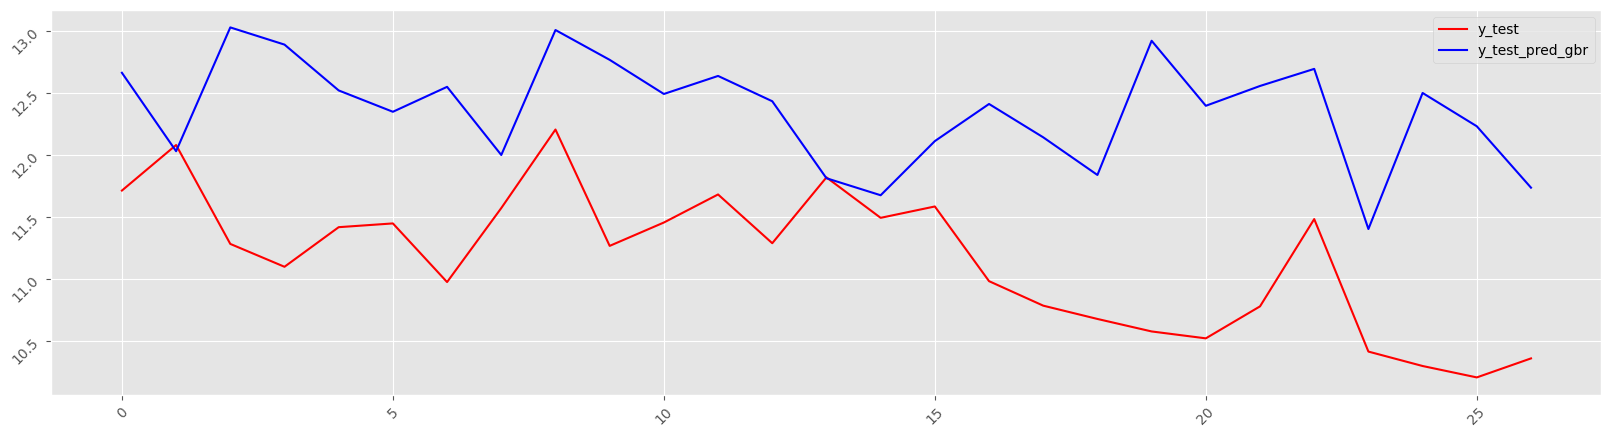

In [52]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_gbr, color="blue")
ax2.legend(("y_test", "y_test_pred_gbr"))
ax2.tick_params(rotation=45)
plt.show()

In [53]:

from joblib import dump, load

num = get_next_model_number(model_dir)
GBR_model_path = os.path.join(model_dir, f'GBR_{num}.joblib')
dump(GBR_model, GBR_model_path)

['../models\\GBR_17.joblib']

### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [55]:
RFR_model = RandomForestRegressor(random_state=2020)
RFR_model.fit(X_train, y_train)
y_test_pred_rfr = RFR_model.predict(X_test)

#### Performance Comparison: True vs Predicted Values Using Random Forest Regressor

In [56]:
testScoreRFR_MSE = mean_squared_error(y_test, y_test_pred_rfr)
print('Test Score: %.2f MSE' % (testScoreRFR_MSE))

testScoreRFR_MAE = mean_absolute_error(y_test, y_test_pred_rfr)
print('Test Score: %.2f MAE' % (testScoreRFR_MAE))

Test Score: 1.63 MSE
Test Score: 1.15 MAE


In [57]:
result_df['rfr'] = y_test_pred_rfr

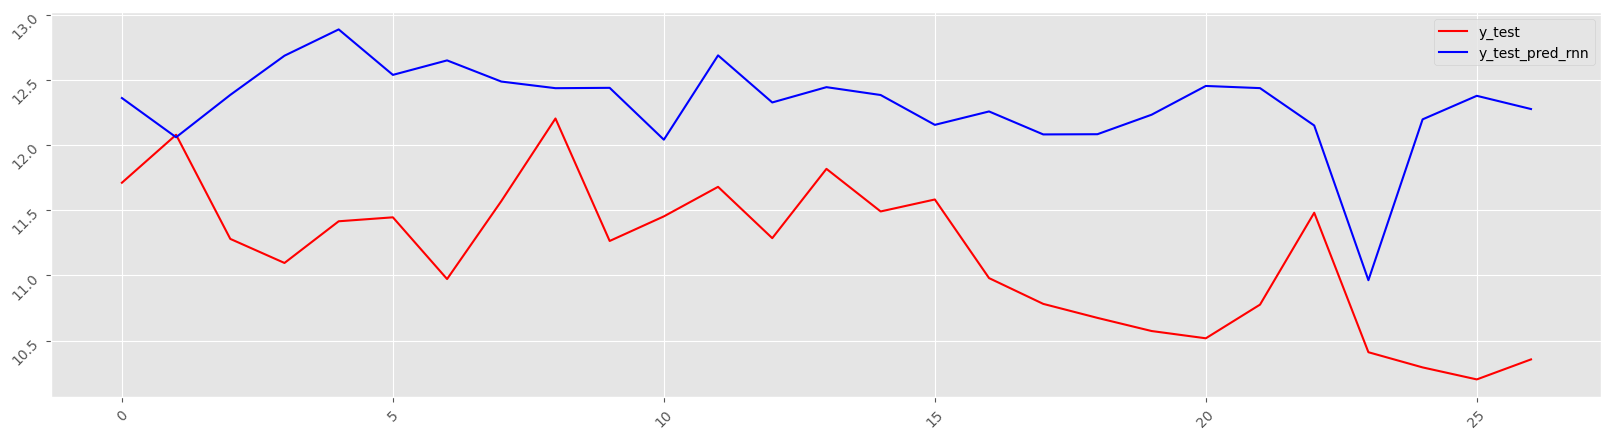

In [58]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_rfr, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
ax2.tick_params(rotation=45)
plt.show()

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_test_pred_lr = LR_model.predict(X_test)

In [61]:
result_df['lr'] = y_test_pred_lr

In [62]:
testScoreLR_MSE = mean_squared_error(y_test, y_test_pred_lr)
print('Test Score: %.2f MSE' % (testScoreLR_MSE))

testScoreLR_MAE = mean_absolute_error(y_test, y_test_pred_lr)
print('Test Score: %.2f MSE' % (testScoreLR_MAE))

Test Score: 1.08 MSE
Test Score: 0.95 MSE


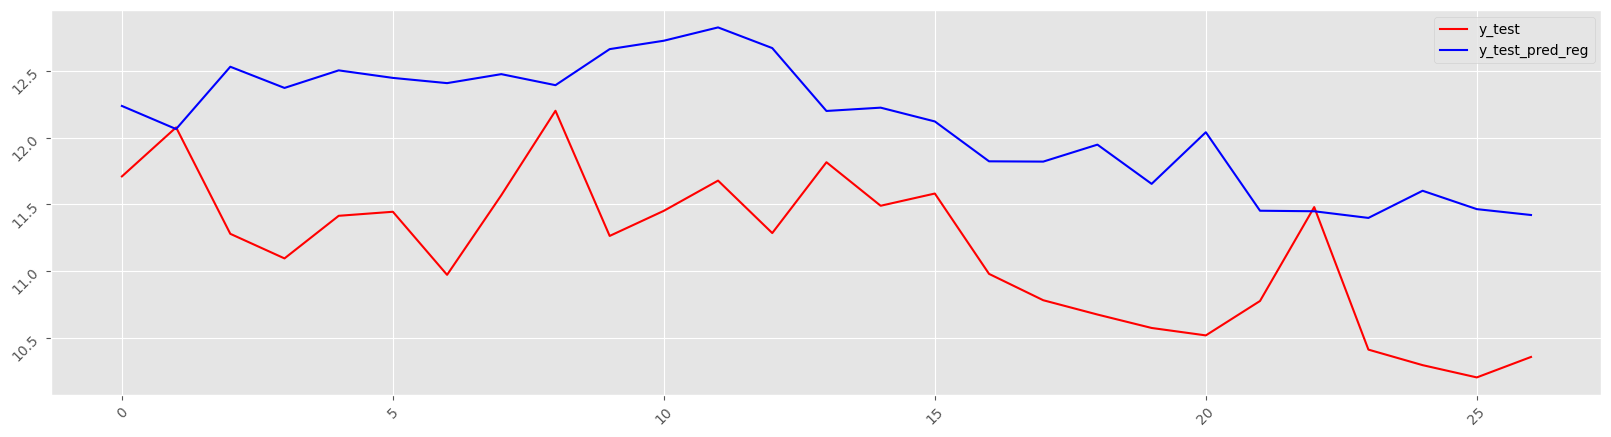

In [63]:

fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_lr, color="blue")
ax2.legend(("y_test", "y_test_pred_reg"))
ax2.tick_params(rotation=45)
plt.show()

### Support Vector Machine

In [64]:
from sklearn.svm import LinearSVR

In [65]:
SVM_model = LinearSVR()
SVM_model.fit(X_train, y_train)
y_test_pred_svm = SVM_model.predict(X_test)

In [66]:
result_df['svm'] = y_test_pred_svm

In [67]:
testScoreSVM_MSE = mean_squared_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MSE' % (testScoreSVM_MSE))

testScoreSVM_MAE = mean_absolute_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MAE' % (testScoreSVM_MAE))

Test Score: 1.31 MSE
Test Score: 1.06 MAE


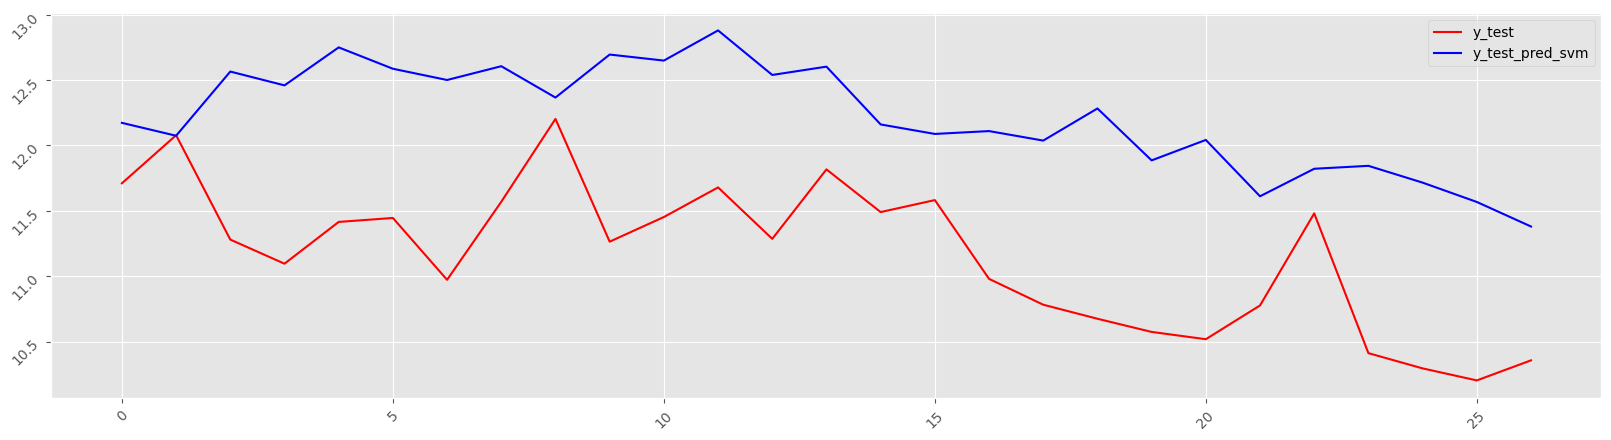

In [68]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_svm, color="blue")
ax2.legend(("y_test", "y_test_pred_svm"))
ax2.tick_params(rotation=45)
plt.show()

### KNN regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
k_value = 5
KNN_model = KNeighborsRegressor(n_neighbors=k_value)
y_test_pred_knn = KNN_model.fit(X_train, y_train).predict(X_test)

In [71]:
result_df['knn'] = y_test_pred_knn

In [72]:
testScoreKNN_MSE = mean_squared_error(y_test, y_test_pred_knn)
print('Test Score: %.2f MSE' % (testScoreKNN_MSE))

testScoreKNN_MAE = mean_absolute_error(y_test, y_test_pred_knn)
print('Test Score: %.2f MAE' % (testScoreKNN_MAE))

Test Score: 1.58 MSE
Test Score: 1.11 MAE


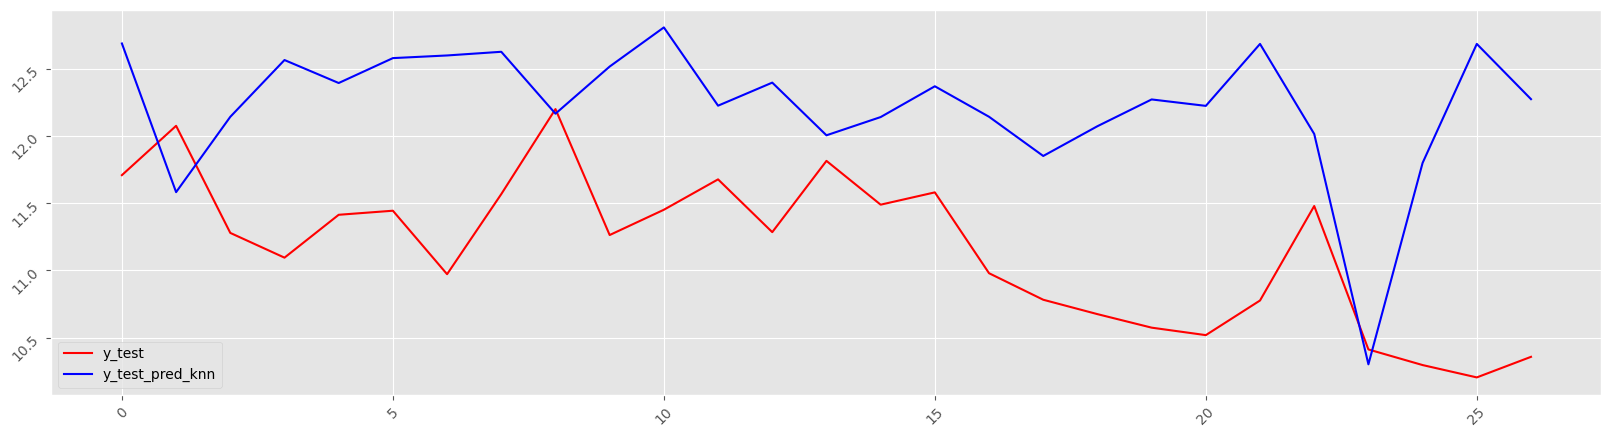

In [73]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_knn, color="blue")
ax2.legend(("y_test", "y_test_pred_knn"))
ax2.tick_params(rotation=45)
plt.show()

In [74]:
result_df.to_csv('../results.csv')

## Summary
In the modeling phase, we explored a range of machine learning algorithms to predict daily average household electricity consumption using weather and temporal variables. This phase involved refining our data preprocessing techniques and evaluating model performance across different algorithms.

Through the integration of new data and refined preprocessing strategies, we observed significant improvements in predictive accuracy across various models:

- **LSTM (Long Short-Term Memory):**
    - The LSTM model demonstrated exceptional predictive performance, achieving a mean squared error (MSE) of 0.20 and a mean absolute error (MAE) of 0.37 on the test data. This model excelled in capturing complex temporal patterns and exhibited strong predictive power.
- **XGBoost:**
    - While not as accurate as LSTM, the XGBoost model delivered competitive results with a test MSE of 0.31 and MAE of 0.45. Despite a negative R² score (-0.05), XGBoost provided valuable insights into ensemble learning techniques for our prediction task.
- **Other Models:**
    - The Gradient Boosting Regressor (GBR) exhibited the least favorable performance among the tested models, with an MSE of 1.82 and a significantly negative R² score (-5.15), indicating potential overfitting and poor generalization.
    - The RandomForestRegressor, Linear Regression, Support Vector Machine (SVM), and KNN Regressor achieved varying degrees of predictive accuracy, with MSE values ranging from 1.08 to 1.63 and MAE values from 0.95 to 1.15.

**Insights and Conclusion**

The modeling phase enabled us to leverage diverse machine learning algorithms, with LSTM emerging as the top-performing model for predicting household electricity consumption. The refined preprocessing techniques and feature selection contributed to improved predictive accuracy, highlighting the importance of data quality and model selection in energy consumption forecasting.

Moving forward, insights gained from this phase will guide future efforts in refining and optimizing predictive models to empower households in managing energy consumption effectively.